## Mitsuba Transient Data Generation

Ref: https://mitransient.readthedocs.io/en/latest/

In [1]:
import mitsuba as mi
mi.set_variant('llvm_ad_rgb')

import mitransient as mitr
import numpy as np
import os

In [2]:
print(mi.variants())

['scalar_rgb', 'scalar_spectral', 'scalar_spectral_polarized', 'llvm_ad_rgb', 'llvm_ad_mono', 'llvm_ad_mono_polarized', 'llvm_ad_spectral', 'llvm_ad_spectral_polarized']


In [3]:
scene = mi.load_file(os.path.abspath('transient/cbox_mirror.xml'))

img_steady, img_transient = scene.integrator().render(scene)

print("Steady: ", img_steady.shape)
print("Transient: ", img_transient.shape)

Steady:  (400, 400, 3)
Transient:  (400, 400, 400, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..18.667196].


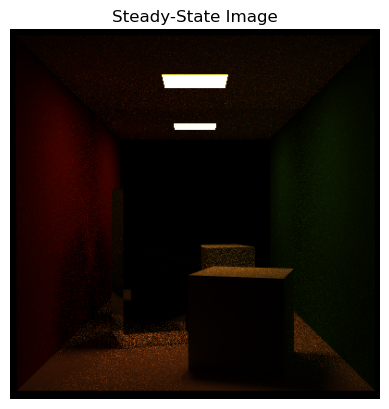

In [4]:
import matplotlib.pyplot as plt

plt.imshow(img_steady)
plt.title("Steady-State Image")
plt.axis("off")
plt.show()

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

def show_rgb_video(video_array, fps=24):
    """
    Show an RGB video from a (H, W, T, 3) numpy array.
    """
    H, W, T, C = video_array.shape
    assert C == 3, "Expected RGB video (last dim should be 3)"

    fig, ax = plt.subplots()
    im = ax.imshow(np.clip(video_array[:, :, 0, :], 0, 1), animated=True)
    ax.axis("off")

    def update(i):
        im.set_array(np.clip(video_array[:, :, i, :], 0, 1))
        return (im,)

    ani = animation.FuncAnimation(fig, update, frames=T, interval=1000/fps, blit=False)
    plt.show()
    return ani

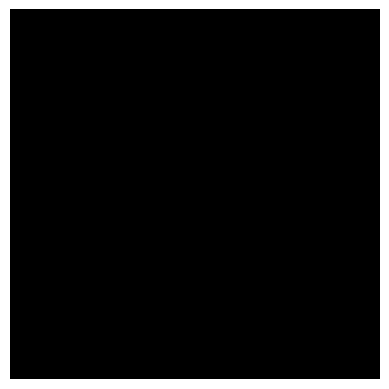

In [6]:
ani = show_rgb_video(img_transient, fps=24)

In [7]:
print(np.abs(img_transient[:, :, 0, :] - img_transient[:, :, 1, :]).max())

0.0


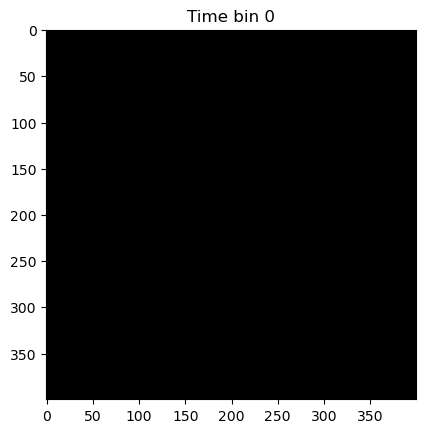

In [8]:
plt.imshow(img_transient[0, :, :, :])
plt.title("Time bin 0")
plt.show()

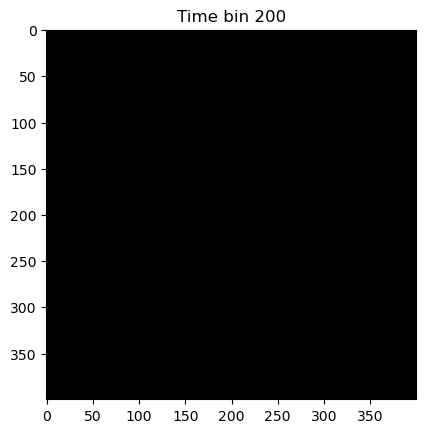

In [9]:
plt.imshow(img_transient[200, :, :, :])
plt.title("Time bin 200")
plt.show()